                                        Importing all needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import sqlite3

                          Decompressed all the csv files with 'gunzip' in terminal
                                  Select only the csv files to work with

In [2]:
csv_files = glob('zippedData/*.csv')
csv_files

['zippedData/tmdb.movies.csv',
 'zippedData/imdb.title.crew.csv',
 'zippedData/tn.movie_budgets.csv',
 'zippedData/imdb.title.ratings.csv',
 'zippedData/imdb.name.basics.csv',
 'zippedData/imdb.title.principals.csv',
 'zippedData/imdb.title.akas.csv',
 'zippedData/bom.movie_gross.csv',
 'zippedData/imdb.title.basics.csv']

                         Put all the files into a dictonary for easier access
                                Renamed to easier names
                                Explored the dataframes
                                

In [3]:
files_dict = {}
for file in csv_files:
    file_cleaned = os.path.basename(file).replace(".csv", "").replace(".", "_")
    file_df = pd.read_csv(file)
    files_dict[file_cleaned] = file_df

In [4]:
files_dict.keys()

dict_keys(['tmdb_movies', 'imdb_title_crew', 'tn_movie_budgets', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_principals', 'imdb_title_akas', 'bom_movie_gross', 'imdb_title_basics'])

In [5]:
files_dict.values()

dict_values([       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1         

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                                                SEE ALL DF   
                Shows all the dataframes in the dictornary to call (in pd.Df format) THE KEYS
                                                INFO/CHOOSE DF
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [6]:
files_dict['tmdb_movies'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
files_dict['tn_movie_budgets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# files_dict['tn_movie_budgets'].shape()

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                                          Merge df to be  useable  
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [9]:
df1 = files_dict['tn_movie_budgets'].merge(files_dict['imdb_title_basics'], how='inner', left_on='movie', right_on='primary_title' )
# merge two df

In [10]:
df = df1.merge(files_dict['imdb_title_crew'], how='inner', left_on='tconst', right_on='tconst')
# merge 3rd df

In [11]:
df.drop(['writers', 'start_year', 'original_title', 'primary_title', 'id'], axis=1, inplace=True)
# drop the not needed columns easier to work with

In [12]:
df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,93.0,Horror,nm3786927
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,113.0,"Action,Adventure,Sci-Fi",nm1334526


In [13]:
df.production_budget = df.production_budget.str.replace('$', '').str.replace(',', '')
df.domestic_gross = df.domestic_gross.str.replace('$', '').str.replace(',', '')
df.worldwide_gross = df.worldwide_gross.str.replace('$', '').str.replace(',', '')
# get ride of dollar sign, commas
# makes the data JUST number

In [14]:
df.production_budget = df.production_budget.astype(int)
df.domestic_gross = df.domestic_gross.astype(int)
df.worldwide_gross = df.worldwide_gross.astype(int)
# Change the columns into NUMBERS type

In [15]:
df.drop_duplicates(subset='movie', inplace=True)
# DROP ALL THE DUPLICATED. Don't need extra data

In [16]:
df['profit_margin'] = ((df['worldwide_gross'] - df["production_budget"]) / df['worldwide_gross']) * 100
# Created a column named profit margin base on calculation for profit margins

In [17]:
df.head(2)
# double check it works

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,93.0,Horror,nm3786927,84.692106
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128,60.733080


In [18]:
df.release_date = pd.to_datetime(df.release_date) 
# change the column into a date/time

In [19]:
df['Month'] =  df['release_date'].apply(lambda x: x.strftime('%m'))
# Create month column that takes the month from release date month option

In [20]:
df.head(2)
# check if everything worked

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,93.0,Horror,nm3786927,84.692106,12
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128,60.733080,05


In [21]:
df.genres= df.genres.str.split(',')
# split the genres into a list by the comma

In [22]:
df.directors = df.directors.str.split(',').str[0]
# split the directors columns

In [23]:
df.genres.fillna('O', inplace=True)
# if genres empty fill it with o

In [24]:
all_genres = []
for genres in df.genres:
    for genre in genres:
        if genre not in all_genres:
            all_genres.append(genre)
        else:
            pass

all_genres
# Create list of unique genres

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Romance',
 'Mystery',
 'O',
 'History',
 'Sport',
 'Biography',
 'Documentary',
 'War',
 'Musical',
 'Music',
 'News']

In [25]:
for genre in all_genres:
    df[genre] = np.zeros(shape=df.shape[0])
# Create columns for each of the genres in list of unique genres

In [26]:
for index, row in df.iterrows():
    if index % 100 == 0:
        print(index)
    for word in row['genres']:
        df.loc[index, word] = 1

# Have python read each word in the genres column and for each genre read change the corresponding column to 1

0
100
200
300
400
500
600
700
800
1000
1100
1700
1800
2000
2100
2200
2500
2700
2900
3000
3200
3400


In [27]:
df.info()
# check that columns made and correctly output

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 3814
Data columns (total 34 columns):
release_date         2312 non-null datetime64[ns]
movie                2312 non-null object
production_budget    2312 non-null int64
domestic_gross       2312 non-null int64
worldwide_gross      2312 non-null int64
tconst               2312 non-null object
runtime_minutes      2138 non-null float64
genres               2312 non-null object
directors            2284 non-null object
profit_margin        2312 non-null float64
Month                2312 non-null object
Horror               2312 non-null float64
Action               2312 non-null float64
Adventure            2312 non-null float64
Fantasy              2312 non-null float64
Sci-Fi               2312 non-null float64
Thriller             2312 non-null float64
Western              2312 non-null float64
Animation            2312 non-null float64
Comedy               2312 non-null float64
Family               2312 non-null fl

In [28]:
df.drop(df[df['worldwide_gross'] == 0]. index, inplace=True)
# drop any rows that do not have worldwide-gross

In [29]:
df.head(2)
# check everything

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,...,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,93.0,[Horror],nm3786927,84.692106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"[Action, Adventure, Fantasy]",nm0551128,60.733080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                CREATE GROUPBY WITH CLEAN DATAFRAMES
                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .

In [30]:
directors_df = df.groupby(['directors']).mean()
# created a table based on the directors and average values

In [31]:
month_df = df.groupby(['Month']).mean()
# created a table based on the months and average values

In [32]:
vote_df = df.merge(files_dict['tmdb_movies'], left_on='movie', right_on='original_title', how='left')
vote_df.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'title', 'release_date_y'], axis=1, inplace=True)
vote_df.drop_duplicates(subset='movie', inplace=True)
vote_df.head(2)
# create a NEW table with voting added

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,...,Sport,Biography,Documentary,War,Musical,Music,News,popularity,vote_average,vote_count
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,93.0,[Horror],nm3786927,84.692106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.526,7.4,18676.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"[Action, Adventure, Fantasy]",nm0551128,60.733080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.579,6.4,8571.0


In [33]:
top_movie_profit = vote_df.groupby(['movie']).mean()['profit_margin'].sort_values( ascending=False)[:10]
# top movies profit margin

                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                CREATE GROUPBY WITH CLEAN GRAPHS
                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .

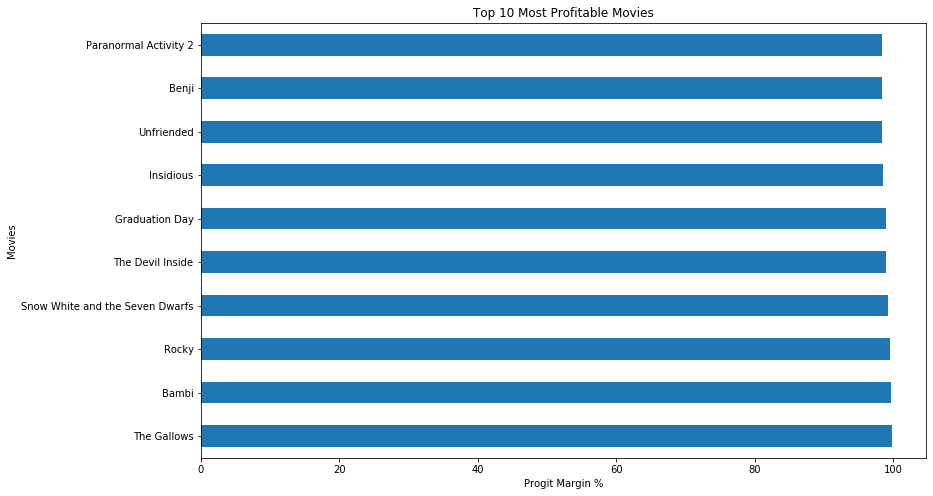

In [34]:
top_movie_profit.plot(kind='barh', figsize=(13,8))
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Progit Margin %')
plt.ylabel('Movies')
plt.show()

In [35]:
director_profit_df = df.groupby('directors')['profit_margin'].mean()
# directors highest profit margin

In [36]:
dir_top_20 = director_profit_df.sort_values(ascending=False)[:20]
dir_top_20.head(5)

directors
nm4000389    99.759941
nm0509852    99.679851
nm1126847    99.555556
nm8856734    99.195352
nm0068587    99.017291
Name: profit_margin, dtype: float64

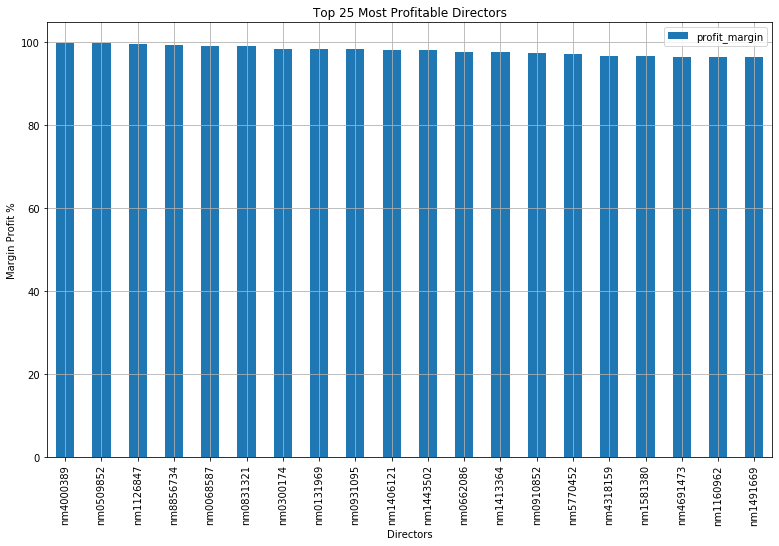

In [37]:
dir_top_20.plot(kind='bar', figsize=(13,8))
plt.title('Top 25 Most Profitable Directors')
plt.xlabel('Directors')
plt.ylabel('Margin Profit %')
plt.legend()
plt.grid(True)

plt.show()

In [38]:
month_gross_df = df.groupby(['Month'])['worldwide_gross'].mean()
# montly release date worldwide gross 

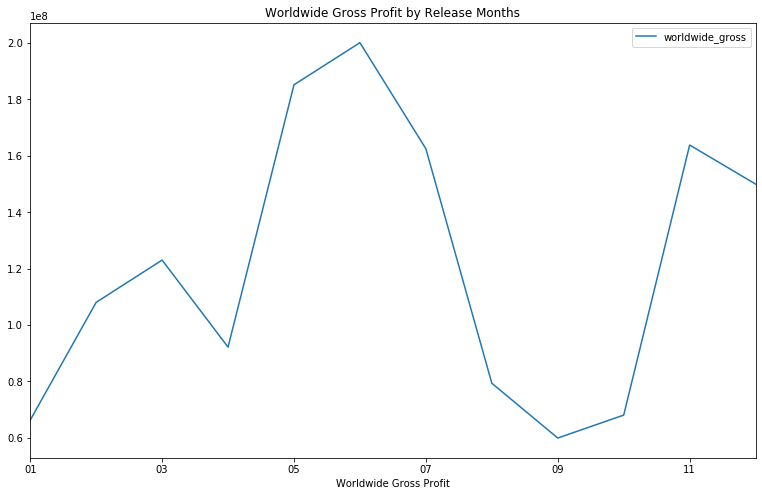

In [39]:
month_gross_df.plot(kind='line', figsize=(13, 8))
plt.title('Worldwide Gross Profit by Release Months')
plt.xlabel('Worldwide Gross Profit')
plt.legend()
plt.show()

In [40]:
top_vote_v_count = vote_df.groupby('movie').max().sort_values(['vote_count', 'vote_average'], ascending=False)['vote_average'][:25]
# top vote vs amount of count

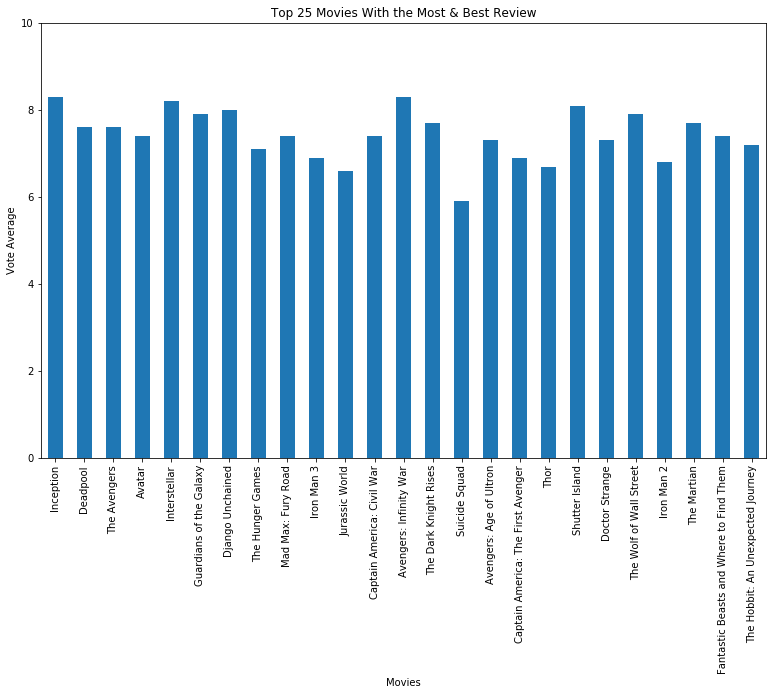

In [41]:
top_vote_v_count.plot(kind='bar', figsize=(13, 8))
plt.title('Top 25 Movies With the Most & Best Review')
plt.ylabel('Vote Average')
plt.xlabel('Movies')
plt.ylim([0,10])
plt.show()